In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"/content/amazon_prime_titles.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
df["director"].mode()

0    Mark Knight
Name: director, dtype: object

In [9]:
non_null = []

for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode()[0],inplace = True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [13]:
df["Month"] = df["date_added"].str.split(" ").str[0]
df["Date"]  = df["date_added"].str.split(" ").str[1]
df["year"]  = df["date_added"].str.split(" ").str[2]

In [14]:
df['Date'] = df["Date"].str.replace(",","")

New DataFrame contains Data of Movies made in India.

In [15]:
# list out the data of the movies which is Made in India

filtered_df = df[df["country"] == 'India']

new_df = filtered_df.reset_index(drop=True)
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Date,year
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
1,s108,Movie,Whoop!,Kreeti Gogia,Abish Mathew,India,"March 30, 2021",2018,18+,64 min,"Arts, Entertainment, and Culture",Abish Mathew is the world's greatest stand-up ...,March,30,2021
2,s143,Movie,Wedding Cha Shinema,Saleel Kulkarni,"Shivraj Waichal, Rucha Inamdar, Mukta Barve, P...",India,"March 30, 2021",2019,ALL,138 min,"Comedy, International",An aspiring filmmaker reluctantly takes up the...,March,30,2021
3,s179,Movie,Viswasam,Siva,"Ajith Kumar, Nayanthara",India,"March 30, 2021",2019,13+,151 min,"Action, Drama, International","A village ruffian, who settles disputes in his...",March,30,2021
4,s181,Movie,Virus,Aashiq Abu,"Revathy, Kunchako Boban, Parvathy Thiruvoth",India,"March 30, 2021",2019,ALL,149 min,"Drama, Science Fiction, Suspense","Virus is a fiction based on true events, revol...",March,30,2021


In [16]:
new_df = new_df.drop('date_added',axis = 1)


In [17]:
new_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Date,year
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
1,s108,Movie,Whoop!,Kreeti Gogia,Abish Mathew,India,2018,18+,64 min,"Arts, Entertainment, and Culture",Abish Mathew is the world's greatest stand-up ...,March,30,2021
2,s143,Movie,Wedding Cha Shinema,Saleel Kulkarni,"Shivraj Waichal, Rucha Inamdar, Mukta Barve, P...",India,2019,ALL,138 min,"Comedy, International",An aspiring filmmaker reluctantly takes up the...,March,30,2021
3,s179,Movie,Viswasam,Siva,"Ajith Kumar, Nayanthara",India,2019,13+,151 min,"Action, Drama, International","A village ruffian, who settles disputes in his...",March,30,2021
4,s181,Movie,Virus,Aashiq Abu,"Revathy, Kunchako Boban, Parvathy Thiruvoth",India,2019,ALL,149 min,"Drama, Science Fiction, Suspense","Virus is a fiction based on true events, revol...",March,30,2021


In [18]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

## Relationship between. how many movies vs TV Shows are made in India


In [19]:
# Relationship between. how many movies vs TV Shows are made in India

new_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,Month,Date,year
0,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
1,s108,Movie,Whoop!,Kreeti Gogia,Abish Mathew,India,2018,18+,64 min,"Arts, Entertainment, and Culture",Abish Mathew is the world's greatest stand-up ...,March,30,2021
2,s143,Movie,Wedding Cha Shinema,Saleel Kulkarni,"Shivraj Waichal, Rucha Inamdar, Mukta Barve, P...",India,2019,ALL,138 min,"Comedy, International",An aspiring filmmaker reluctantly takes up the...,March,30,2021
3,s179,Movie,Viswasam,Siva,"Ajith Kumar, Nayanthara",India,2019,13+,151 min,"Action, Drama, International","A village ruffian, who settles disputes in his...",March,30,2021
4,s181,Movie,Virus,Aashiq Abu,"Revathy, Kunchako Boban, Parvathy Thiruvoth",India,2019,ALL,149 min,"Drama, Science Fiction, Suspense","Virus is a fiction based on true events, revol...",March,30,2021


In [20]:
grouped = new_df.groupby('type').size()

In [21]:
count = grouped.reset_index(name='count')
print(count)

      type  count
0    Movie    213
1  TV Show     16


[]

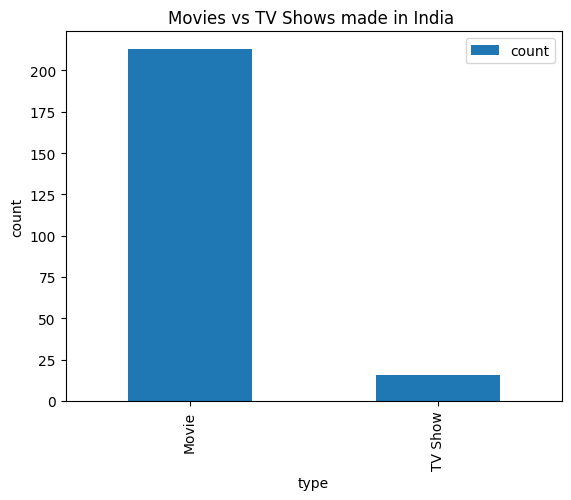

In [22]:
count.plot(kind='bar',x = 'type',y='count')
plt.xlabel("type")
plt.ylabel("count")
plt.title("Movies vs TV Shows made in India ")
plt.plot()

In [23]:
# How many movies are released in all the years

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Date,year
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,March,30,2021
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,March,30,2021
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",March,30,2021
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,March,30,2021


In [24]:
df['release_year'].unique()

array([2014, 2018, 2017, 1989, 2016, 1994, 2020, 2019, 2008, 2001, 1941,
       1991, 2005, 2015, 2011, 2013, 1949, 2007, 2002, 1955, 1959, 1983,
       2009, 2012, 2010, 1986, 1988, 1920, 1936, 1992, 2021, 1993, 2006,
       1948, 1946, 1944, 1935, 1985, 1937, 1970, 1945, 1939, 1996, 1997,
       1974, 1938, 1978, 2004, 1943, 1975, 1960, 1934, 1940, 1961, 2003,
       2000, 1967, 1995, 1951, 1932, 1999, 1963, 1969, 1952, 1947, 1929,
       1990, 1925, 1968, 1987, 1942, 1979, 1980, 1981, 1976, 1966, 1973,
       1956, 1972, 1950, 1953, 1982, 1977, 1933, 1958, 1984, 1998, 1924,
       1922, 1926, 1954, 1930, 1971, 1965, 1931, 1923, 1962, 1964, 1957,
       1927])

## Top 10 recent movies


In [25]:
# Top 10 recent movies

df_movies = df[df['type']== 'Movie']
movies_per_year = df_movies[["title","release_year"]].groupby('release_year').size().reset_index(name='count')

[]

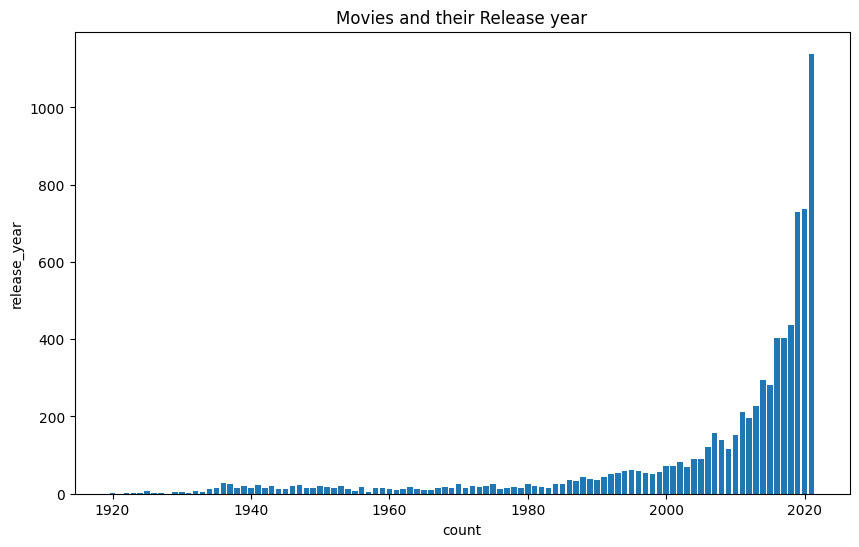

In [26]:
plt.figure(figsize=(10,6))
plt.bar(movies_per_year['release_year'],movies_per_year["count"])
plt.xlabel("count")
plt.ylabel("release_year")
plt.title("Movies and their Release year")
plt.plot()

# TV Shows and their Release Year

In [27]:
df_TvShow = df[df['type']== 'TV Show']
TV_Show_per_year = df_TvShow[["title","release_year"]].groupby('release_year').size().reset_index(name='count')

[]

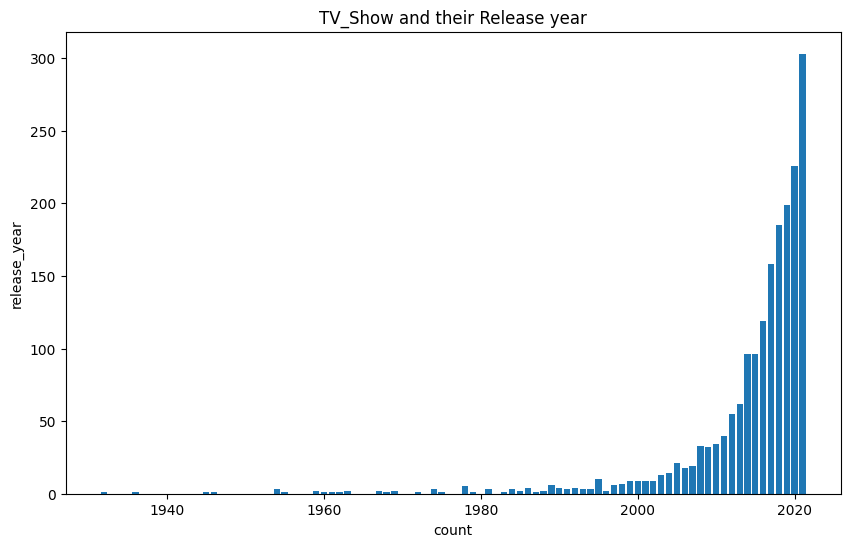

In [28]:
plt.figure(figsize=(10,6))
plt.bar(TV_Show_per_year['release_year'],TV_Show_per_year["count"])
plt.xlabel("count")
plt.ylabel("release_year")
plt.title("TV_Show and their Release year")
plt.plot()

In [29]:
df["rating"].unique()

array(['13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+', 'TV-PG',
       '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G', 'PG',
       'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

# List all the movies which are not suitable for kids

In [30]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Date,year
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,March,30,2021
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,March,30,2021
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",March,30,2021
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,March,30,2021


In [36]:
adult_ratings = ["18+","R", "NC-17"]

adult_movies = df[(df["type"] == "Movie")  & (df['rating'].isin(adult_ratings))]
adult_movie_title = adult_movies['title'].tolist()

print(adult_movie_title)

['Zoe', 'Zandalee', 'Young Lovers', "You're Not You", 'Yellowneck', 'Xchange', 'X-Ray', 'Wrangler: Anatomy of an Icon', 'Woman Of Desire', 'William Lee Martin: Standing in the Middle', 'Wild Geese', 'Whoop!', 'What Price Crime', 'Western Gold', 'We Need to Talk About Kevin', 'Watermelon Man', 'Wall Street Cowboy', 'Waiting on Mary', 'Voice From the Stone', 'Virginia', 'Uncle Tom', 'Uncaged', 'Ultimate Fight', 'Twenty Bucks', 'Tuff Turf', 'True Colors', 'Tropic Thunder', 'Trois 3: The Escort', 'Transit', 'Trading Paint', 'Tracktown', 'Too Late For Love', "Tone Bell: Can't Cancel This", 'Tomorrow When The War Began', 'Tom Wilson: Bigger Than You', 'Tom Green: Live!', 'TJ: January 3rd', 'Timber War', 'Till Human Voices Wake Us', 'Ticker', 'Tick Tock', 'Thunder Alley (1985)', 'Things We Lost In The Fire', 'The Yellow Birds', 'The Wicker Man (1973)', 'The Wedding Year', 'The Tall Man', 'The Swap', 'The Submarine Kid', 'The Stoned Age (1994)', 'The Special', 'The Souvenir', 'The Sklar Brothe

In [37]:
print(len(adult_movie_title))

2110


In [40]:
df["listed_in"].unique()

array(['Comedy, Drama', 'Drama, International', 'Action, Drama, Suspense',
       'Documentary', 'Drama, Fantasy', 'Fantasy, Kids',
       'Documentary, Special Interest', 'Comedy',
       'Action, Science Fiction, Suspense', 'Drama', 'Adventure, Kids',
       'Horror, Suspense', 'Documentary, Sports',
       'Horror, Science Fiction', 'Kids, Special Interest',
       'Comedy, Talk Show and Variety', 'Science Fiction', 'Kids',
       'Action, Anime, Comedy',
       'Arts, Entertainment, and Culture, Comedy, Drama', 'TV Shows',
       'Animation, Anime, Fantasy', 'Action, Adventure, Animation',
       'Anime, Kids', 'Music Videos and Concerts', 'Drama, Suspense',
       'Fitness, Special Interest',
       'Faith and Spirituality, Special Interest', 'Special Interest',
       'Fitness', 'Action, Military and War, Western',
       'Arts, Entertainment, and Culture, Comedy, Talk Show and Variety',
       'Action, Western', 'Documentary, Science Fiction',
       'Adventure, Animation, Kids'

# Content in each country

In [41]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Date,year
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,13+,113 min,"Comedy, Drama",A small fishing village must procure a local d...,March,30,2021
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,March,30,2021
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,13+,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...,March,30,2021
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,13+,69 min,Documentary,"Pink breaks the mold once again, bringing her ...",March,30,2021
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,13+,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...,March,30,2021


In [47]:
content_country_distribution = df.groupby("country").count()["show_id"].nlargest(10).sort_values()

<Axes: ylabel='country'>

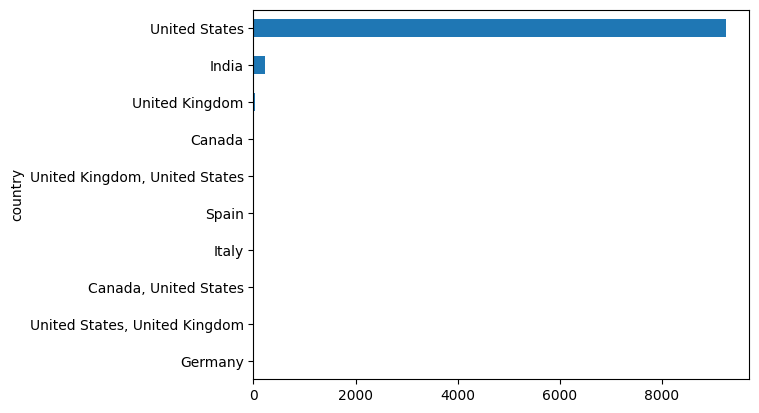

In [49]:
content_country_distribution.plot(kind='barh')

## Since this data has many outlier values I will be creating on more Data Analysis on this dataset in future

|------------------------------------------------------------------------------------------------xxx---------------------xxx-----------------------------------------------------------------------|